## Day 8

https://adventofcode.com/2024/day/8#part2

In [1]:
from collections import defaultdict

def read_input_08(filename):
    f = open(filename)
    antennas = defaultdict(list)
    lines = f.readlines()
    for j,l in enumerate(lines):
        for i,c in enumerate(l.strip()):
            if c!=".":
                antennas[c].append((i,j))
    xmax = len(lines[0].strip())-1
    ymax = len(lines)-1
    return antennas, xmax, ymax

In [2]:
from itertools import combinations

def antinodes(a1,a2):
    x1,y1 = a1
    x2,y2 = a2
    return (2.*x2-x1,2.*y2-y1),(2.*x1-x2,2.*y1-y2)

def in_boundaries(a,xmax,ymax):
    xa,ya = a
    return 0<=xa<=xmax and 0<=ya<=ymax

def find_antinodes(antennas,xmax,ymax):
    antinodes_city = set() # avoid antinode overlaps    
    for freq in antennas.keys():
        for a1,a2 in combinations(antennas[freq],2):
            for an in antinodes(a1,a2):
                if in_boundaries(an,xmax,ymax):
                    antinodes_city.add(an)
    return antinodes_city

def part1(filename):
    antennas, xmax, ymax = read_input_08(filename)
    return len(find_antinodes(antennas,xmax,ymax))

In [3]:
print("Test 1:",part1("examples/example08.txt"))
print("Part 1:",part1("AOC2024inputs/input08.txt"))

Test 1: 14
Part 1: 265


In [4]:
def antinodes_harmonics(a1,a2,xmax,ymax):
    x1,y1 = a1
    x2,y2 = a2
    dx,dy = x2-x1, y2-y1
    ants = {a1}
    for d in (+1,-1):
        a = a1
        while True:
            xa,ya = a
            a = (xa+d*dx,ya+d*dy)
            if in_boundaries(a,xmax,ymax):
                ants.add(a)
            else:
                break
    return ants

def find_antinodes_harmonics(antennas,xmax,ymax):
    antinodes_city_harmonics = set() 
    for freq in antennas.keys():
        for a1,a2 in combinations(antennas[freq],2):
            for an in antinodes_harmonics(a1,a2,xmax,ymax):
                antinodes_city_harmonics.add(an)
    return antinodes_city_harmonics 
    
def part2(filename):
    antennas, xmax, ymax = read_input_08(filename)
    return len(find_antinodes_harmonics(antennas,xmax,ymax))

In [5]:
print("Test 1:",part2("examples/example08.txt"))
print("Part 1:",part2("AOC2024inputs/input08.txt"))

Test 1: 34
Part 1: 962


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

def animate_part2(filename = "AOC2024inputs/input08.txt"):
    antennas, xmax, ymax = read_input_08(filename)

    city = np.zeros((ymax+1,xmax+1))
    for i,a in enumerate(antennas.keys()):
        for x,y in antennas[a]:
            city[y,x]=100

    f = plt.figure(figsize=(6,6),dpi=100)
    ax = f.add_axes([0, 0, 1, 1])
    ax.axis('off')
    camera = Camera(f)
    cmap = "hot"
    
    plt.imshow(city,cmap=cmap,vmin=0,vmax=100)
    camera.snap()
    
    for i,freq in enumerate(antennas.keys()):
        for a1,a2 in combinations(antennas[freq],2):
            for x,y in antinodes_harmonics(a1,a2,xmax,ymax):
                city[y,x]=25+i
            plt.imshow(city,cmap=cmap,vmin=0,vmax=100)
            camera.snap()
    return camera

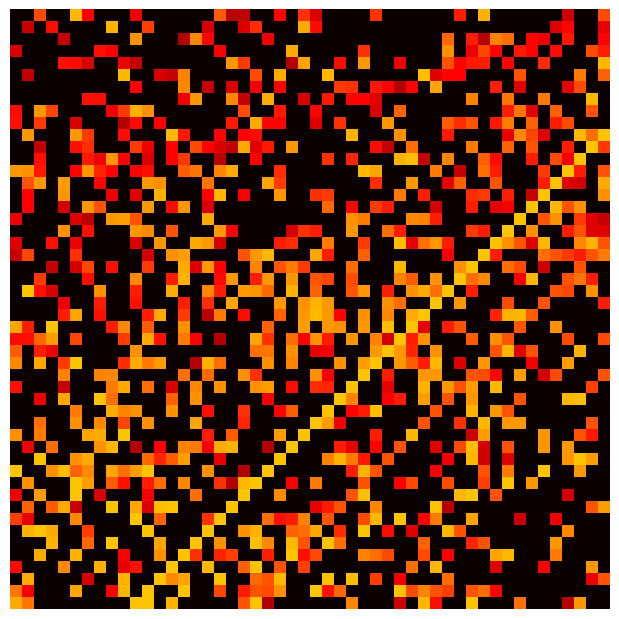

In [7]:
camera = animate_part2()
anim = camera.animate(blit=True)
anim.save("visualisation/day08animation_part2.gif",writer='pillow')

![Antennas](visualisation/day08animation_part2.gif)